In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
import FlowCal
import scipy.stats as stats

seed = 42
random.seed(seed)
np.random.seed(seed)


In [11]:
# Compute histogram of pairwise distances for random sample of s01

def pairwise_distances(S, nbins):

    N = S.shape[0]
    distances = np.linalg.norm((S[1:] - S[0]), axis=1)
    for i in range(1, N-1):
        s = S[i]
        V = S[i+1:]
        d = np.linalg.norm((V - s), axis=1)

        distances = np.append(distances, d)

    H = np.histogram(distances, bins=nbins)
    
    return distances, H

Text(0.5, 1.0, 'Histogram of Original Pair-wise Distances, 1000 samples')

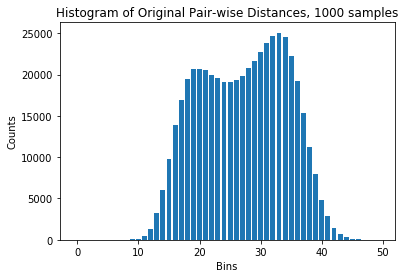

In [4]:
# Original distance histogram

data_dir = "../SamusikData/"
s01_fn = data_dir + "BM2_cct_normalized_01_non-Neutrophils.fcs"
s01 = FlowCal.io.FCSData(s01_fn)

# Only relevant indexes are 10-47
s01 = s01[:, 10:47]

# Sample random indices
N = 1000
idx = np.random.randint(s01.shape[0], size=N)

# Transform data with arcsinh
s01 = np.arcsinh(np.array(s01))

origD, origH = pairwise_distances(s01[idx], 50)

plt.figure()
plt.bar(np.arange(50), origH[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of Original Pair-wise Distances, 1000 samples")

Text(0.5, 1.0, 'Histogram of tsne Pair-wise Distances, 1000 samples')

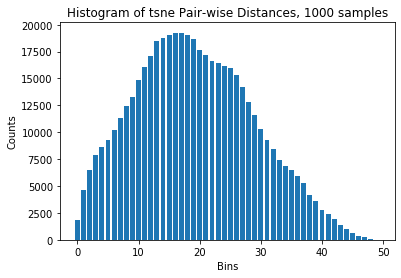

In [10]:
# TSNE histogram
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
tsne_D, tsne_H = pairwise_distances(s01_tsne[idx], 50)

plt.figure()
plt.bar(np.arange(50), tsne_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of tsne Pair-wise Distances, 1000 samples")


Text(0.5, 1.0, 'Histogram of umap Pair-wise Distances, 1000 samples')

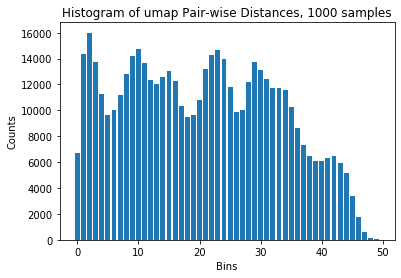

In [12]:
# umap histogram
s01_umap = np.load("../Embeddings/s01_umap.npy")
umap_D, umap_H = pairwise_distances(s01_umap[idx], 50)

plt.figure()
plt.bar(np.arange(50), umap_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of umap Pair-wise Distances, 1000 samples")



Text(0.5, 1.0, 'Histogram of 2layer Pair-wise Distances, 1000 samples')

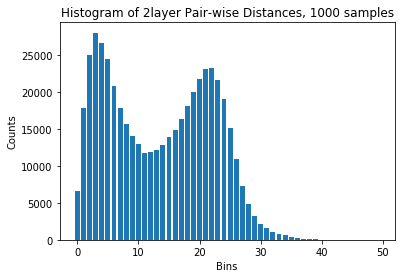

In [13]:
# 2 layer AE histogram
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
twolayer_D, twolayer_H = pairwise_distances(s01_2layer[idx], 50)

plt.figure()
plt.bar(np.arange(50), twolayer_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of 2layer Pair-wise Distances, 1000 samples")

Text(0.5, 1.0, 'Histogram of 6layer Pair-wise Distances, 1000 samples')

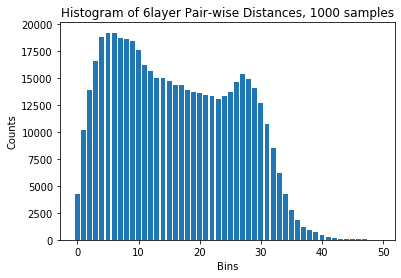

In [14]:
# 6 layer AE histogram
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
sixlayer_D, sixlayer_H = pairwise_distances(s01_6layer[idx], 50)

plt.figure()
plt.bar(np.arange(50), sixlayer_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of 6layer Pair-wise Distances, 1000 samples")

Text(0.5, 1.0, 'Histogram of vae Pair-wise Distances, 1000 samples')

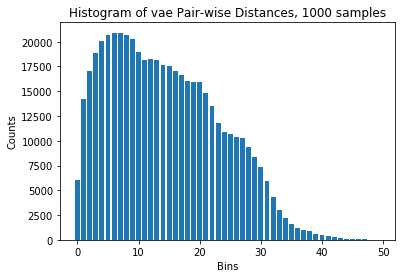

In [15]:
# VAE histogram
s01_vae = np.load("../Embeddings/s01_vae.npy")
vae_D, vae_H = pairwise_distances(s01_vae[idx], 50)

plt.figure()
plt.bar(np.arange(50), vae_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of vae Pair-wise Distances, 1000 samples")

0
1
2


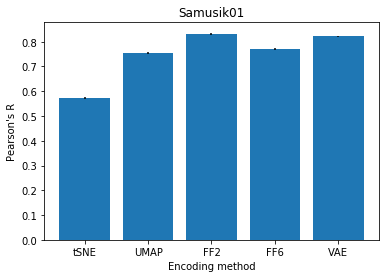

In [14]:
# Compute all pair-wise distance correlations, N=1000, 3 reps
N = 1000
reps = 3

data_dir = "../SamusikData/"
s01_fn = data_dir + "BM2_cct_normalized_01_non-Neutrophils.fcs"
s01 = FlowCal.io.FCSData(s01_fn)

# Only relevant indexes are 10-47
s01 = s01[:, 10:47]

# Transform data with arcsinh
s01 = np.arcsinh(np.array(s01))

# Load other embeddings
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
s01_umap = np.load("../Embeddings/s01_umap.npy")
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
s01_vae = np.load("../Embeddings/s01_vae.npy")

tsne_Rs = []
umap_Rs = []
twolayer_Rs = []
sixlayer_Rs = []
vae_Rs = []

for i in range(reps):
    
    print(i)
    
    idx = np.random.randint(s01.shape[0], size=N)
    
    origD, orig_H = pairwise_distances(s01[idx], 50)
    tsne_D, tsne_H = pairwise_distances(s01_tsne[idx], 50)
    umap_D, umap_H = pairwise_distances(s01_umap[idx], 50)
    twolayer_D, twolayer_H = pairwise_distances(s01_2layer[idx], 50)
    sixlayer_D, sixlayer_H = pairwise_distances(s01_6layer[idx], 50)
    vae_D, vae_H = pairwise_distances(s01_vae[idx], 50)
    
    tsne_R, tsne_p = stats.pearsonr(origD, tsne_D)
    umap_R, umap_p = stats.pearsonr(origD, umap_D)
    twolayer_R, twolayer_p = stats.pearsonr(origD, twolayer_D)
    sixlayer_R, sixlayer_p = stats.pearsonr(origD, sixlayer_D)
    vae_R, vae_p = stats.pearsonr(origD, vae_D)

    tsne_Rs.append(tsne_R)
    umap_Rs.append(umap_R)
    twolayer_Rs.append(twolayer_R)
    sixlayer_Rs.append(sixlayer_R)
    vae_Rs.append(vae_R)

tsne_R_mean = np.mean(tsne_Rs)
umap_R_mean = np.mean(umap_Rs)
twolayer_R_mean = np.mean(twolayer_Rs)
sixlayer_R_mean = np.mean(sixlayer_Rs)
vae_R_mean = np.mean(vae_Rs)

tsne_R_std = np.std(tsne_Rs)
umap_R_std = np.std(umap_Rs)
twolayer_R_std = np.std(twolayer_Rs)
sixlayer_R_std = np.std(sixlayer_Rs)
vae_R_std = np.std(vae_Rs)
    
fig, ax = plt.subplots()
ax.bar(np.arange(5), [tsne_R_mean, umap_R_mean, twolayer_R_mean, sixlayer_R_mean, vae_R_mean], 
            yerr=[tsne_R_std, umap_R_std, twolayer_R_std, sixlayer_R_std, vae_R_std])
ax.set_xticklabels(["", "tSNE", "UMAP", "FF2", "FF6", "VAE"])
ax.set_xlabel("Encoding method")
ax.set_ylabel("Pearson's R")
ax.set_title("Samusik01")

fig.savefig("../Figures/pairwise_distance_correlations_s01")

0
1
2


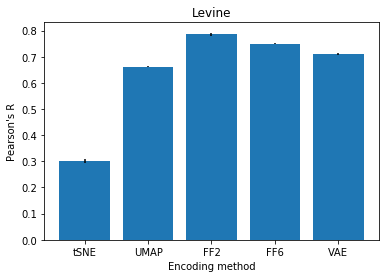

In [15]:
# Pairwise distances for levine dataset# Compute all pair-wise distance correlations, N=1000, 3 reps
N = 1000
reps = 3

data_dir = "../LevineData/"
levine_fn = data_dir + "Levine_32dim_notransform.fcs"
levine = FlowCal.io.FCSData(levine_fn)

# Columns 4-36 (0-indexed) are relevant markers
# column 39 (0-indexed) is labels

# 60% of the dataset is garbage
non_garbage_idx = np.where(np.isnan(levine[:, 39]) == False)
levine = levine[non_garbage_idx]

levine = levine[:, 4:36]

# Transform data with arcsinh
levine = np.arcsinh(np.array(levine))

# Only relevant indexes are 10-47
levine = levine[:, 10:47]

# Transform data with arcsinh
levine = np.arcsinh(np.array(levine))

# Load other embeddings
levine_tsne = np.load("../Embeddings/levine_tsne.npy")
levine_umap = np.load("../Embeddings/levine_umap.npy")
levine_2layer = np.load("../Embeddings/levine_2layer.npy")
levine_6layer = np.load("../Embeddings/levine_6layer.npy")
levine_vae = np.load("../Embeddings/levine_vae.npy")

tsne_Rs = []
umap_Rs = []
twolayer_Rs = []
sixlayer_Rs = []
vae_Rs = []

for i in range(reps):
    
    print(i)
    
    idx = np.random.randint(levine.shape[0], size=N)
    
    origD, orig_H = pairwise_distances(levine[idx], 50)
    tsne_D, tsne_H = pairwise_distances(levine_tsne[idx], 50)
    umap_D, umap_H = pairwise_distances(levine_umap[idx], 50)
    twolayer_D, twolayer_H = pairwise_distances(levine_2layer[idx], 50)
    sixlayer_D, sixlayer_H = pairwise_distances(levine_6layer[idx], 50)
    vae_D, vae_H = pairwise_distances(levine_vae[idx], 50)
    
    tsne_R, tsne_p = stats.pearsonr(origD, tsne_D)
    umap_R, umap_p = stats.pearsonr(origD, umap_D)
    twolayer_R, twolayer_p = stats.pearsonr(origD, twolayer_D)
    sixlayer_R, sixlayer_p = stats.pearsonr(origD, sixlayer_D)
    vae_R, vae_p = stats.pearsonr(origD, vae_D)

    tsne_Rs.append(tsne_R)
    umap_Rs.append(umap_R)
    twolayer_Rs.append(twolayer_R)
    sixlayer_Rs.append(sixlayer_R)
    vae_Rs.append(vae_R)

tsne_R_mean = np.mean(tsne_Rs)
umap_R_mean = np.mean(umap_Rs)
twolayer_R_mean = np.mean(twolayer_Rs)
sixlayer_R_mean = np.mean(sixlayer_Rs)
vae_R_mean = np.mean(vae_Rs)

tsne_R_std = np.std(tsne_Rs)
umap_R_std = np.std(umap_Rs)
twolayer_R_std = np.std(twolayer_Rs)
sixlayer_R_std = np.std(sixlayer_Rs)
vae_R_std = np.std(vae_Rs)
    
fig, ax = plt.subplots()
ax.bar(np.arange(5), [tsne_R_mean, umap_R_mean, twolayer_R_mean, sixlayer_R_mean, vae_R_mean], 
            yerr=[tsne_R_std, umap_R_std, twolayer_R_std, sixlayer_R_std, vae_R_std])
ax.set_xticklabels(["", "tSNE", "UMAP", "FF2", "FF6", "VAE"])
ax.set_xlabel("Encoding method")
ax.set_ylabel("Pearson's R")
ax.set_title("Levine")

fig.savefig("../Figures/pairwise_distance_correlations_levine")